In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("heart failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.shape

(299, 13)

In [4]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

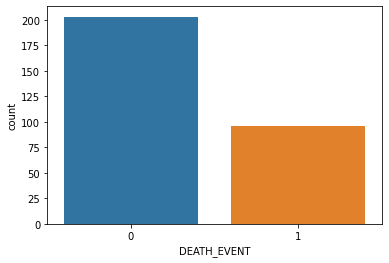

In [5]:
sns.countplot(x = 'DEATH_EVENT', data=df)

<AxesSubplot:xlabel='anaemia', ylabel='count'>

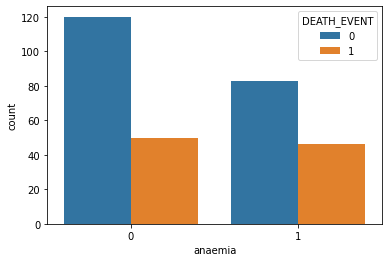

In [6]:
sns.countplot(hue = 'DEATH_EVENT', data=df, x='anaemia')

<AxesSubplot:xlabel='diabetes', ylabel='count'>

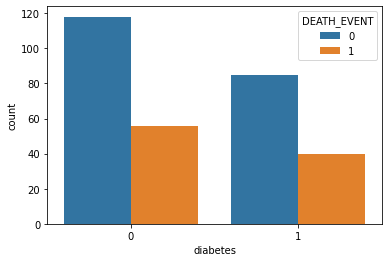

In [7]:
sns.countplot(hue = 'DEATH_EVENT', data=df, x='diabetes')

<AxesSubplot:xlabel='smoking', ylabel='count'>

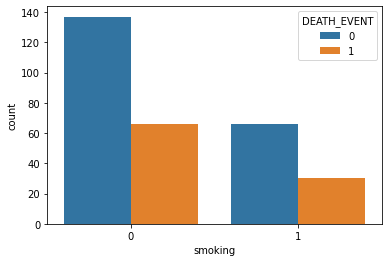

In [8]:
sns.countplot(hue = 'DEATH_EVENT', data=df, x='smoking')

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

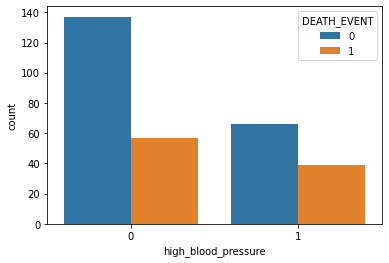

In [9]:
sns.countplot(hue = 'DEATH_EVENT', data=df, x='high_blood_pressure') 

In [10]:
#plt.figure(figsize=(20,20))
#sns.pairplot(df)

In [11]:
#sep x,y
x = df.drop('DEATH_EVENT',axis=1)

In [12]:
y=df['DEATH_EVENT']

In [13]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [14]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest, ytrain, ytest =  train_test_split(x,y,test_size=.35)

In [17]:
xtest.shape

(105, 12)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
clf=DecisionTreeClassifier()

In [20]:
clf.fit(xtrain,ytrain) #train with default parameters

DecisionTreeClassifier()

In [21]:
pred = clf.predict(xtest)

In [22]:
pred

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

# Confusion Matrix

In [23]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,roc_curve,plot_roc_curve

In [24]:
cm = confusion_matrix(ytest,pred)
cm

array([[57, 12],
       [16, 20]], dtype=int64)

In [25]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        69
           1       0.62      0.56      0.59        36

    accuracy                           0.73       105
   macro avg       0.70      0.69      0.70       105
weighted avg       0.73      0.73      0.73       105



In [26]:
clf.score(xtest,ytest)

0.7333333333333333

In [27]:
accuracy1 = accuracy_score(ytest,pred) # pred is predicted y ; ytest is actual
print('Acc for Decision Tree is',accuracy1)

Acc for Decision Tree is 0.7333333333333333


Text(33.0, 0.5, 'Actual Values')

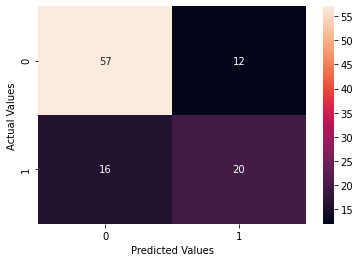

In [28]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rclf = RandomForestClassifier()

In [31]:
rclf.fit(xtrain,ytrain)

RandomForestClassifier()

In [32]:
pred2 = rclf.predict(xtest)

In [33]:
pred2

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [34]:
cm2 = confusion_matrix(ytest,pred2)
cm2

array([[62,  7],
       [13, 23]], dtype=int64)

In [35]:
rclf.score(xtest,ytest)

0.8095238095238095

# Hyper Parameter Tuning / Optimization

# Randomized Search CV

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
#Update Parameters

n_estimators = [int(x) for x in np.linspace(start=100, stop=500, num=15)]
n_estimators

[100, 128, 157, 185, 214, 242, 271, 300, 328, 357, 385, 414, 442, 471, 500]

In [38]:
np.random.randint(100,500,15)

array([123, 244, 188, 144, 332, 435, 247, 159, 252, 394, 248, 348, 340,
       124, 330])

In [39]:
#Update Parameters

n_estimators = [int(x) for x in np.linspace(start=100, stop=500, num=15)]
max_features = ['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(start=10, stop=100, num=15)]
min_samples_split = [2,4,5,6,7,9,10]
min_samples_leaf = [2,3,5,6,7,9,12]
criterion = ['entropy','gini']

grids = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'criterion' :  criterion
}

print(grids)

{'n_estimators': [100, 128, 157, 185, 214, 242, 271, 300, 328, 357, 385, 414, 442, 471, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 16, 22, 29, 35, 42, 48, 55, 61, 67, 74, 80, 87, 93, 100], 'min_samples_split': [2, 4, 5, 6, 7, 9, 10], 'min_samples_leaf': [2, 3, 5, 6, 7, 9, 12], 'criterion': ['entropy', 'gini']}


In [40]:
rnf = RandomForestClassifier()

In [41]:
rmcv = RandomizedSearchCV(rnf,grids,n_iter=200,cv=3)

In [42]:
rmcv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=200,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 16, 22, 29, 35, 42,
                                                      48, 55, 61, 67, 74, 80,
                                                      87, 93, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 5, 6, 7, 9,
                                                             12],
                                        'min_samples_split': [2, 4, 5, 6, 7, 9,
                                                              10],
                                        'n_estimators': [100, 128, 157, 185,
                                                         214, 242, 271, 300,
                                            

In [43]:
rmcv.cv_results_

{'mean_fit_time': array([0.2839702 , 0.20702298, 0.50589013, 0.48426263, 0.31835723,
        0.21350439, 0.24474605, 0.28637934, 0.20829686, 0.4321909 ,
        0.39573956, 0.497413  , 0.54153013, 0.45287474, 0.74180468,
        0.37490201, 0.38678678, 0.35973787, 1.19470755, 0.57529505,
        0.5241611 , 0.42793703, 0.61155597, 0.52467982, 0.56066275,
        0.16662955, 0.51484911, 0.57800341, 0.46487284, 0.25515954,
        0.40581878, 0.42259034, 0.41847563, 0.68148692, 0.14060378,
        0.50509111, 0.63526924, 0.32804767, 0.14057724, 0.32806182,
        0.56834737, 0.20829654, 0.43739875, 0.32806063, 0.47383595,
        0.29159602, 0.52072525, 0.50509199, 0.40615376, 0.65609614,
        0.35929139, 0.28640167, 0.1666282 , 0.69253318, 0.67692375,
        0.43738627, 0.62795655, 0.14059329, 0.67692391, 0.5571479 ,
        0.17702969, 0.65687744, 0.60924522, 0.58840259, 0.17182334,
        0.17184544, 0.13017456, 0.16661501, 0.52591689, 0.59882172,
        0.23432231, 0.20306595,

In [44]:
result = pd.DataFrame(rmcv.cv_results_)

In [45]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.283970,0.013356,0.020845,7.358518e-03,214,4,12,sqrt,67,gini,"{'n_estimators': 214, 'min_samples_split': 4, ...",0.784615,0.830769,0.781250,0.798878,0.022592,197
1,0.207023,0.006435,0.020829,7.363560e-03,157,5,12,auto,35,gini,"{'n_estimators': 157, 'min_samples_split': 5, ...",0.800000,0.846154,0.796875,0.814343,0.022530,180
2,0.505890,0.006871,0.036449,7.365415e-03,385,4,5,log2,42,gini,"{'n_estimators': 385, 'min_samples_split': 4, ...",0.815385,0.876923,0.843750,0.845353,0.025149,44
3,0.484263,0.000002,0.031240,2.973602e-07,357,6,6,log2,93,gini,"{'n_estimators': 357, 'min_samples_split': 6, ...",0.800000,0.892308,0.828125,0.840144,0.038631,80
4,0.318357,0.006936,0.031241,3.893359e-07,242,9,9,auto,55,entropy,"{'n_estimators': 242, 'min_samples_split': 9, ...",0.800000,0.830769,0.796875,0.809215,0.015295,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.604035,0.014719,0.046865,1.140650e-06,442,4,3,log2,48,entropy,"{'n_estimators': 442, 'min_samples_split': 4, ...",0.846154,0.892308,0.812500,0.850321,0.032714,38
196,0.598806,0.007346,0.057277,7.362148e-03,471,7,6,sqrt,87,gini,"{'n_estimators': 471, 'min_samples_split': 7, ...",0.800000,0.876923,0.843750,0.840224,0.031503,69
197,0.130190,0.007355,0.015621,2.193796e-06,100,4,7,sqrt,42,entropy,"{'n_estimators': 100, 'min_samples_split': 4, ...",0.800000,0.846154,0.843750,0.829968,0.021213,134
198,0.312426,0.000001,0.020828,7.361537e-03,242,5,12,sqrt,74,gini,"{'n_estimators': 242, 'min_samples_split': 5, ...",0.800000,0.800000,0.812500,0.804167,0.005893,189


In [46]:
rmcv.best_score_

0.8657852564102564

In [47]:
rmcv.best_params_

{'n_estimators': 157,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 74,
 'criterion': 'gini'}

In [48]:
rfc = rmcv.best_estimator_

In [49]:
rfc.score(xtest,ytest)

0.819047619047619

In [50]:
rfc.score(x,y)

0.9264214046822743

# XGBoost Classifier

In [51]:
!pip install xgboost
import xgboost
from xgboost import XGBClassifier

In [52]:
xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)

[22:01:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
xgb.score(xtest,ytest)

0.7714285714285715

In [54]:
xgb.score(x,y)

0.919732441471572

In [55]:
rclf.score(x,y)

0.9331103678929766

In [56]:
clf.score(x,y)

0.9063545150501672